## 数据透视

In [4]:
import pandas as pd

df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo"],
                   "B": ["one", "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small"],
                   "D": [1, 2, 2, 3, 3],
                   "E": [2, 4, 5, 5, 6]})
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                       columns=['C'], aggfunc="sum")

print(table)
print(type(table))
print(table.index)
print(table.columns)
print(table.describe())

C        large  small
A   B                
foo one    4.0    1.0
    two    NaN    6.0
<class 'pandas.core.frame.DataFrame'>
MultiIndex([('foo', 'one'),
            ('foo', 'two')],
           names=['A', 'B'])
Index(['large', 'small'], dtype='object', name='C')
C      large     small
count    1.0  2.000000
mean     4.0  3.500000
std      NaN  3.535534
min      4.0  1.000000
25%      4.0  2.250000
50%      4.0  3.500000
75%      4.0  4.750000
max      4.0  6.000000


## PduMux Duration

max=1128, max_xsfn=819/58, avg=36.51070886502895


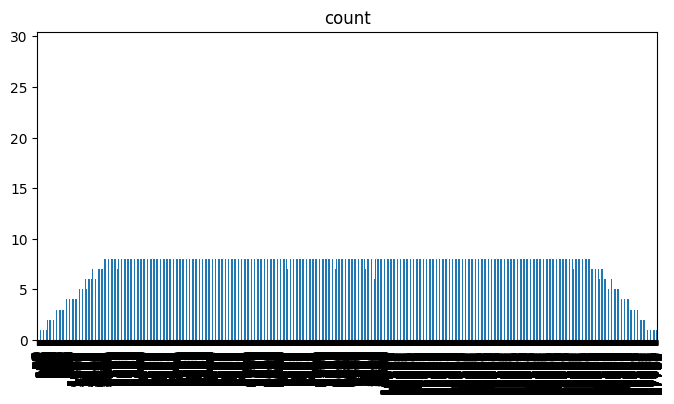

In [2]:
import pandas as pd

selected_columns = ['sfn', 'slot', 'handleMsgOffsetInSlot', 'sendPayloadOffsetInSlot']

input_file_path = r'C:\N-20L6PF1F2MV8-Data\lianbche\Documents\2024\08\01-check maxpdumux\vdu-12690\12960-MacPduMuxReq.csv'
selected_df = pd.read_csv(input_file_path, usecols=selected_columns)

groups = selected_df.groupby(['sfn', 'slot'])        
new_df = groups.count()

new_df['cost'] = groups['sendPayloadOffsetInSlot'].last() - groups['handleMsgOffsetInSlot'].first()
new_df = new_df.reset_index()
new_df['sendPayloadOffsetInSlot'].plot(kind='bar', figsize=(8, 4), title='count')

idxmax = new_df['cost'].idxmax()
print('max={}, max_xsfn={}/{}, avg={}'.format(
    new_df['cost'].max(), new_df['sfn'][idxmax], new_df['slot'][idxmax], new_df['cost'].mean()))
